## Playing with the universal approximation theorem
A 1-layer single-input single-output ReLU neural network can represent arbitrary smooth functions. Lets take a look at this. 

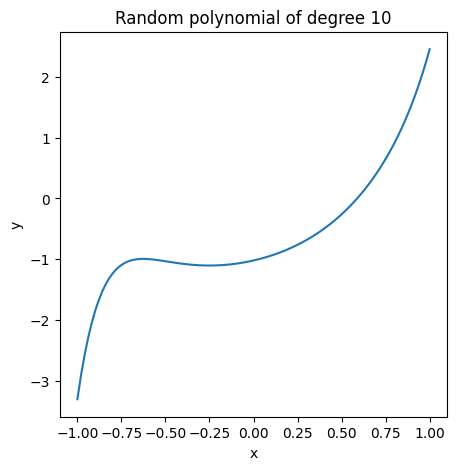

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

def set_seed(seed=0):
    np.random.seed(seed)
    torch.manual_seed(seed)

# generate a random 1-d polynomial function of high degree
order = 10
poly_coeff = np.random.randn(order)
lambda x: np.polyval(poly_coeff, x)

# plot the polynomial over the range [-1, 1]
plt.figure(figsize=(5,5))
x_space = np.linspace(-1, 1, 100)
plt.plot(x_space, np.polyval(poly_coeff, x_space))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Random polynomial of degree {}'.format(order))
plt.show()


In [16]:
# lets fit a torch network to this with a controllable number of hidden units
class ShallowNet(torch.nn.Module):
    def __init__(self, hidden_units):
        super(ShallowNet, self).__init__()
        self.fc1 = torch.nn.Linear(1, hidden_units)
        self.fc2 = torch.nn.Linear(hidden_units, 1)
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

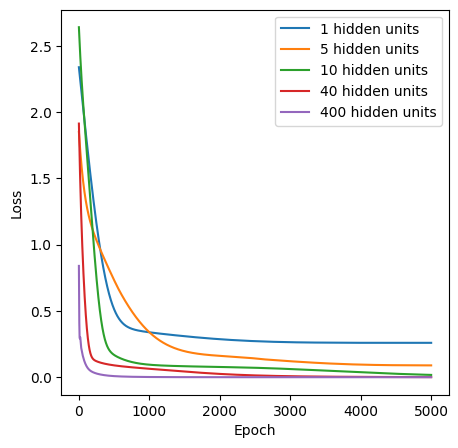

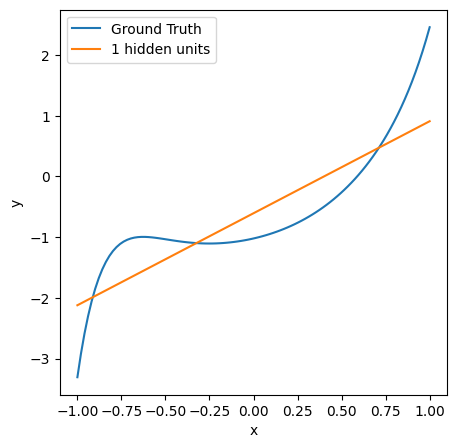

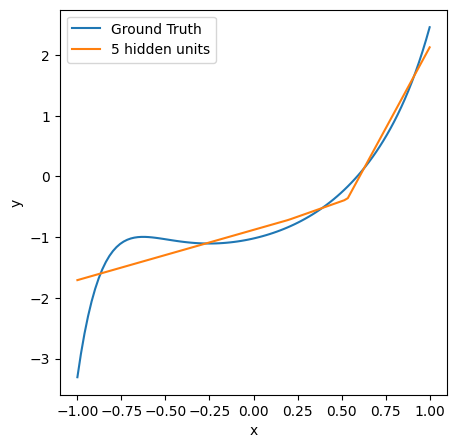

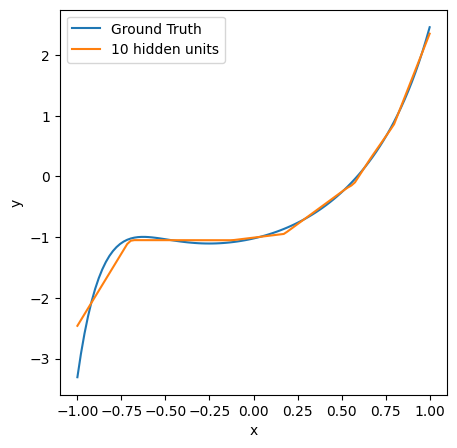

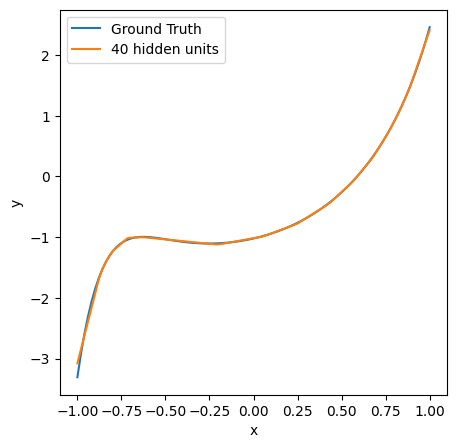

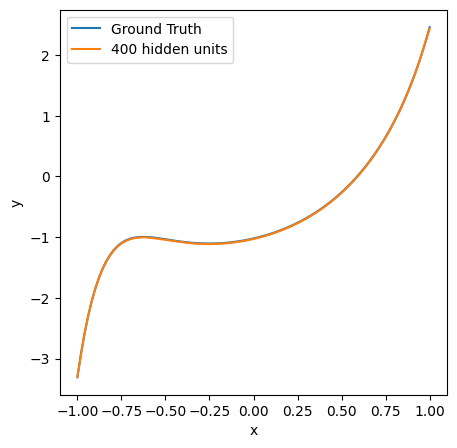

In [17]:
# okay now lets fit things

# first, set up the data in torch
x = torch.tensor(x_space, dtype=torch.float32).view(-1, 1)
y = torch.tensor(np.polyval(poly_coeff, x_space), dtype=torch.float32).view(-1, 1)


def fit_model(hidden_units, num_epochs=5000, lr=1e-3):
    model = ShallowNet(hidden_units)
    losses = []
    loss_function = torch.nn.MSELoss()
    # NOTE: here we're using what's called the ADAM optimizer
    # instead of SGD. We'll circle back to this and 
    # discuss it in more detail later in the course.
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    
    
    for _ in range(num_epochs):
        optimizer.zero_grad()
        y_pred = model(x)
        loss = loss_function(y_pred, y)
        losses.append(loss.item())
        loss.backward()
        optimizer.step()
        
    return model, losses

num_hidden_units = [1, 5, 10, 40, 400]
model_list = []
losses = []
for hidden_units in num_hidden_units:
   model, loss = fit_model(hidden_units)
   model_list.append(model)
   losses.append(loss)

# plot the losses
plt.figure(figsize=(5,5))
for hidden_units, loss in zip(num_hidden_units, losses):
    plt.plot(loss, label='{} hidden units'.format(hidden_units))  
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() 

# now plot the results of the models
for hidden_units, model in zip(num_hidden_units, model_list):
    plt.figure(figsize=(5,5))
    plt.plot(x_space, np.polyval(poly_coeff, x_space), label='Ground Truth')
    plt.plot(x_space, model(torch.tensor(x_space, dtype=torch.float32).view(-1, 1)).detach().numpy(), label='{} hidden units'.format(hidden_units))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
plt.show()
